## Data Exploration

### Data Origins

### Downloading the Data


Data can be downloaded from https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
Or using `kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection` if you have the kaggle CLI


In [ ]:

## Folder Structure:

folder = """

├── code  
└── dataset  
    └── brain-mri-images-for-brain-tumor-detection  
        └── brain_tumor_dataset
            └── raw
                ├── no  
                └── yes
            
"""
## you will have to create the "raw" folder and move the "no" and "yes" folders under raw.

In [3]:
!pip uninstall opencv-python --yes
!pip install opencv-python-headless

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 24.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
## libraries:

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [5]:
## data directory
dataset_dir = "../dataset/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/raw/"
img_extentions = (".png", ".jpg", ".jpeg")

## normal scans
neg_path = dataset_dir + "/no/"
neg_imgs_path = [os.path.join(neg_path, file) for file in os.listdir(neg_path) if file.lower().endswith(img_extentions)]

## brain cancer scans
pos_path = dataset_dir + "/yes/"
pos_imgs_path = [os.path.join(pos_path, file) for file in os.listdir(pos_path) if file.lower().endswith(img_extentions)]


In [6]:
plt.bar(["Normal", "Brain Cancer"], [len(neg_imgs_path), len(pos_imgs_path)])


print("The dataset contains: \n" + str(len(neg_imgs_path)) + " normal brain scans \n" + str(len(pos_imgs_path)) + " brain cancer scans \n" )



The dataset contains: 
98 normal brain scans 
155 brain cancer scans 



In [7]:
## Exploring the images in the dataset to see if they have standardized sizing and pixel intensity


def get_imgs(img_path_array):
    """function that loads images into an array given image paths"""
    imgs = []
    for path in img_path_array:
        img = cv2.imread(path)
        imgs.append(img)
    return imgs

def get_img_size(img_path_array):
    """function that returns an array of tuples of image sizes given image paths"""
    img_size = []
    for path in img_path_array:
        img = cv2.imread(path)
        img_size.append(img.shape)
    
    return img_size

def get_img_pixel_prop(img_path_array):
    """function that returns an array of pixel properties: Min, Max, Mean and Median given image paths"""
    img_pixels = []
    for path in img_path_array:
        img = cv2.imread(path)
        img_pixels.append((img.min(), img.max(), img.mean(), np.median(img)))
    
    return img_pixels



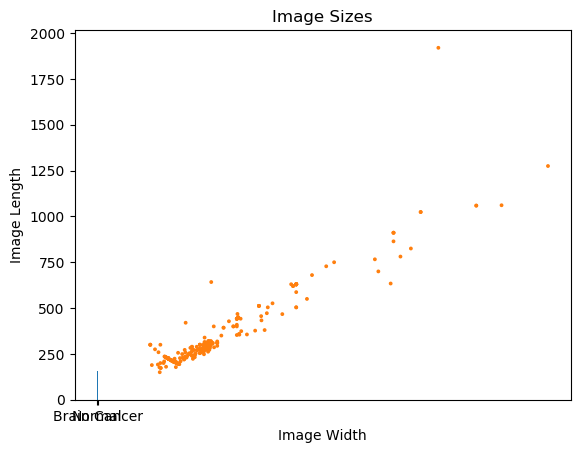

In [8]:
img_size = get_img_size(neg_imgs_path) +  get_img_size(pos_imgs_path)

plt.scatter(*zip(*img_size));
plt.title("Image Sizes")
plt.xlabel("Image Width")
plt.ylabel("Image Length")
plt.show();

In [9]:
img_size

[(442, 442, 3),
 (275, 220, 3),
 (252, 200, 3),
 (1024, 1024, 3),
 (168, 300, 3),
 (250, 201, 3),
 (449, 359, 3),
 (225, 225, 3),
 (243, 207, 3),
 (275, 220, 3),
 (225, 225, 3),
 (630, 630, 3),
 (225, 225, 3),
 (361, 642, 3),
 (400, 393, 3),
 (251, 201, 3),
 (231, 218, 3),
 (238, 212, 3),
 (252, 200, 3),
 (442, 441, 3),
 (512, 512, 3),
 (442, 442, 3),
 (217, 232, 3),
 (192, 192, 3),
 (400, 393, 3),
 (236, 214, 3),
 (630, 630, 3),
 (213, 236, 3),
 (214, 235, 3),
 (168, 300, 3),
 (250, 201, 3),
 (225, 225, 3),
 (301, 275, 3),
 (200, 200, 3),
 (680, 680, 3),
 (225, 225, 3),
 (251, 201, 3),
 (442, 442, 3),
 (530, 380, 3),
 (338, 276, 3),
 (259, 194, 3),
 (444, 468, 3),
 (442, 409, 3),
 (168, 300, 3),
 (217, 232, 3),
 (630, 630, 3),
 (326, 276, 3),
 (340, 339, 3),
 (225, 225, 3),
 (242, 208, 3),
 (197, 177, 3),
 (222, 227, 3),
 (225, 225, 3),
 (225, 225, 3),
 (225, 225, 3),
 (1080, 1920, 3),
 (630, 630, 3),
 (474, 356, 3),
 (264, 210, 3),
 (454, 442, 3),
 (231, 218, 3),
 (280, 420, 3),
 (20

Images seem to have 3 channels but have various dimensions. We need to standardize image size.
Let's look at image pixel intensity.


In [10]:
img_pxl_neg_min, img_pxl_neg_max, img_pxl_neg_mean, img_pxl_neg_median = zip(*get_img_pixel_prop(neg_imgs_path))
img_pxl_pos_min, img_pxl_pos_max, img_pxl_pos_mean, img_pxl_pos_median = zip(*get_img_pixel_prop(pos_imgs_path))

In [11]:
img_pxl = [
    [np.mean(img_pxl_neg_min), np.mean(img_pxl_neg_max), np.mean(img_pxl_neg_mean), np.mean(img_pxl_neg_median)],
    [np.mean(img_pxl_pos_min), np.mean(img_pxl_pos_max), np.mean(img_pxl_pos_mean), np.mean(img_pxl_pos_median)]
]

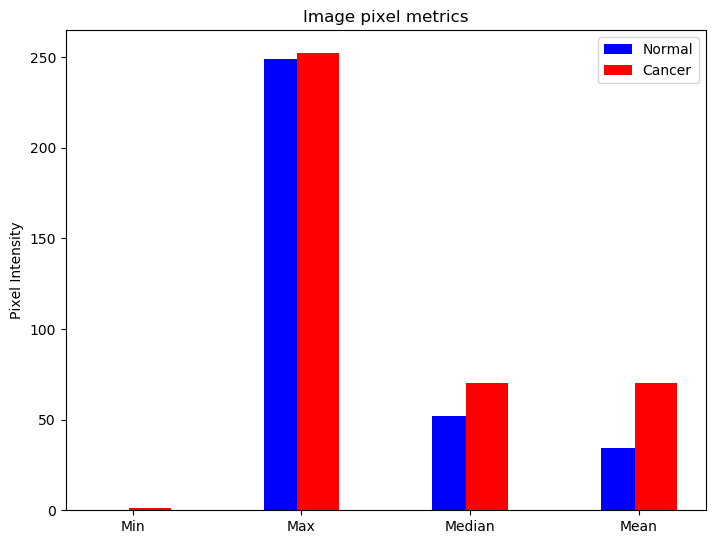

In [12]:
Xaxis = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Xaxis - 0.1, img_pxl[0], color = "b", width = 0.25)
ax.bar(Xaxis + 0.1, img_pxl[1], color = "r", width = 0.25)
plt.xticks(Xaxis, ["Min", "Max", "Median", "Mean"])
plt.title("Image pixel metrics")
plt.ylabel("Pixel Intensity")
plt.legend(["Normal", "Cancer"])
plt.show();

Images have pixel values of 0-255. We can bring that to a 0-1 scale before training.
The cancer images seem to have a higher intensity median and mean than the Normal images
Let's look at a few images to see if any cleanup can be done.


In [13]:
def plot_sample_imgs(imgs, labels, num_samples, title=""):
    fig, ax = plt.subplots(2, num_samples, figsize=(num_samples*2, num_samples))
    if title:
        fig.suptitle(title)
    for k in range(num_samples*2):
        i, j = k//num_samples, k%num_samples
        ax[i, j].imshow(imgs[k])
        ax[i, j].set_title(labels[k])
        ax[i, j].axis("off")
    plt.show()

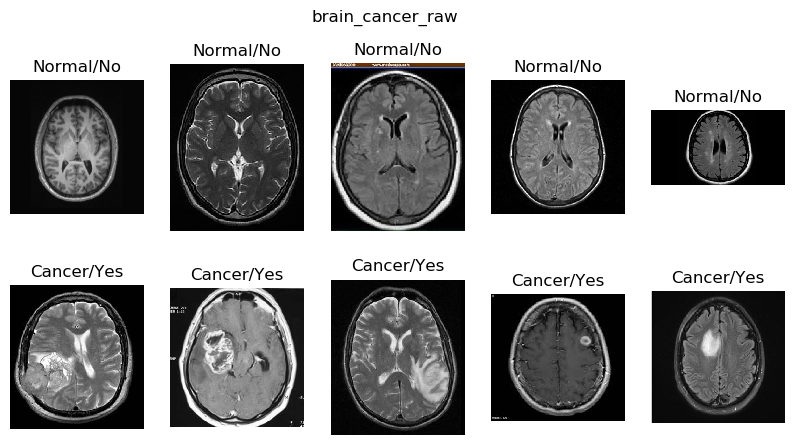

In [14]:
num_samples = 5
neg_imgs = get_imgs(neg_imgs_path[0:num_samples])
pos_imgs = get_imgs(pos_imgs_path[0:num_samples])

imgs = neg_imgs + pos_imgs
labels = ["Normal/No"] * num_samples + ["Cancer/Yes"] * num_samples

plot_sample_imgs(imgs, labels, num_samples, "brain_cancer_raw")

Some images seem to have black contours around them that are not part of the human brain. We can crop those out so our training data has mostly useful data.

In [15]:
def zero_runs(arr):
    """function that detects consecutive zeros"""
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(arr, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges

def crop_img(img, threshold=0.1):
    """function that crops an array based on a threshold"""
    img_len, img_width = img.shape
    x_min, y_min, x_max, y_max = 0, 0, img_width, img_len
    mask = img > threshold
    bounds_x = zero_runs(mask.sum(axis=0))
    bounds_y = zero_runs(mask.sum(axis=1))
    # if there are zero runs, check if they start at 0 and end at image len
    if bounds_x.size != 0:
        if bounds_x[0][0] == 0:
            x_min = bounds_x[0][1]

        if bounds_x[-1][1] == x_max:
            x_max = bounds_x[-1][0]

    if bounds_y.size != 0:
        if bounds_y[0][0] == 0:
            y_min = bounds_y[0][1]

        if bounds_y[-1][1] == y_max:
            y_max = bounds_y[-1][0]

    return img[y_min:y_max, x_min:x_max]


def process_img(img, img_size = (100, 100)):
    """function that processes the images.
    It converts them to gray scale with 1 channel only.
    It scales them to 0-1, crops negative space around them and resizes them"""
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_grey_norm = (img_grey / 255)
    img_grey_cropped = crop_img(img_grey_norm)
    img_grey_std = cv2.resize(img_grey_cropped, img_size)
    return img_grey_std

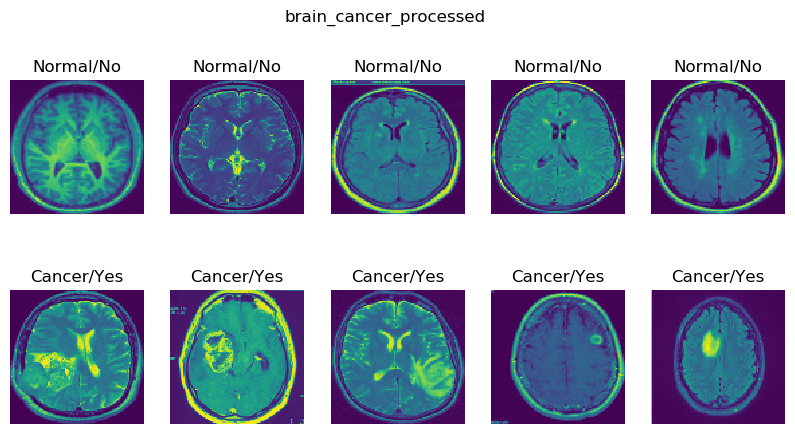

In [16]:
neg_imgs_crop = [process_img(img) for img in neg_imgs]
pos_imgs_crop = [process_img(img) for img in pos_imgs]

imgs_cropped = neg_imgs_crop + pos_imgs_crop

plot_sample_imgs(imgs_cropped, labels, num_samples, "brain_cancer_processed")


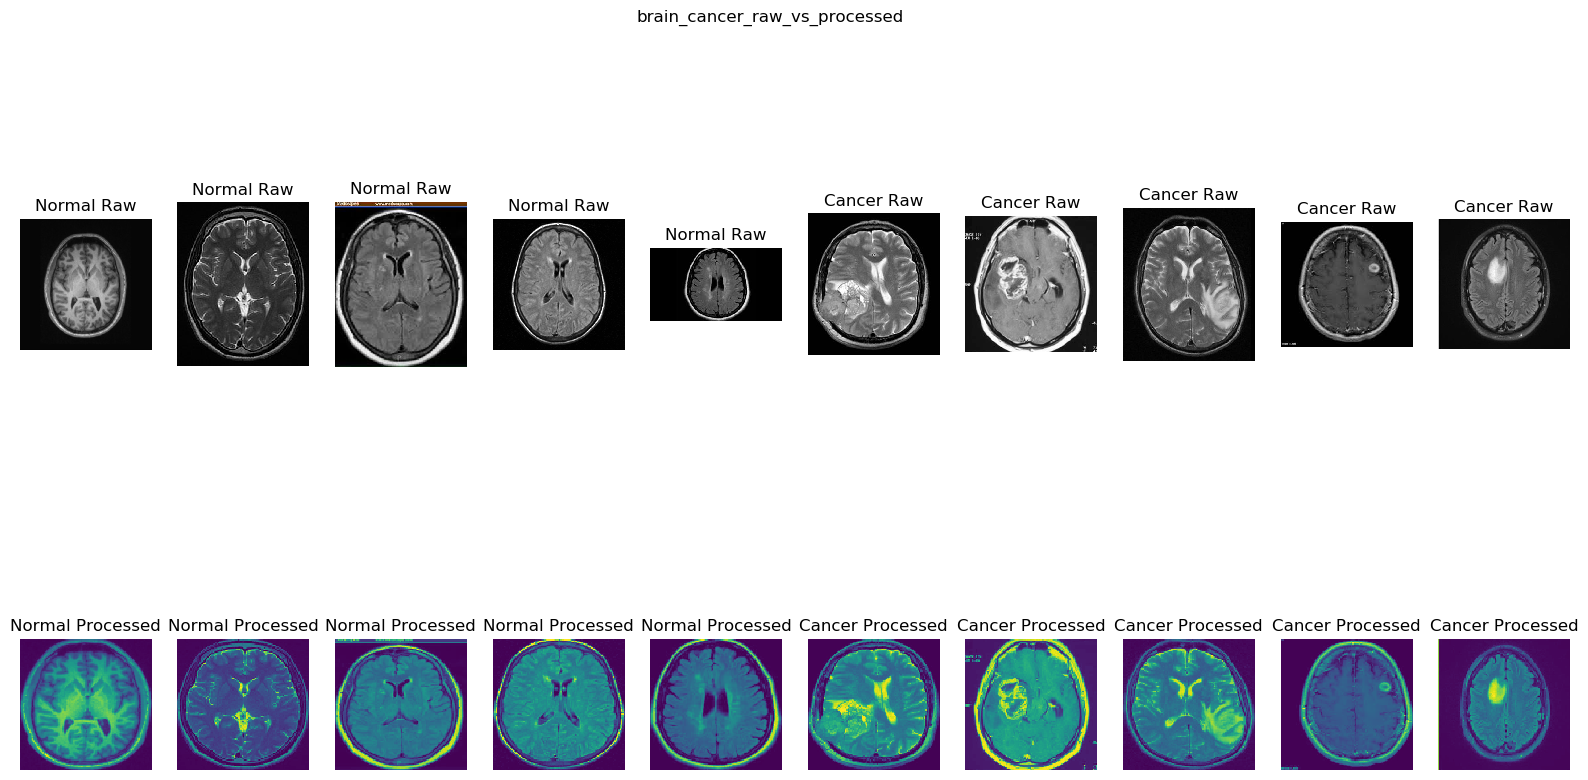

In [17]:
## Compare raw images with processed images:

imgs_all = neg_imgs + pos_imgs + neg_imgs_crop + pos_imgs_crop
labels_all = ["Normal Raw"] * num_samples + ["Cancer Raw"] * num_samples + ["Normal Processed"] * num_samples + ["Cancer Processed"] * num_samples

plot_sample_imgs(imgs_all, labels_all, num_samples*2, "brain_cancer_raw_vs_processed")


We now have a way to convert the images to gray scale with 1 channel only. We scale the images to 0-1, crop negative space around them and resizes them. Now we can package these function to process the data and split into train, test and validation to start training out model